In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Physical constants

In [135]:
h_bar = 1.054571596*10**(-34) # Converted Plank const
mrb = 87*1.66053873*10**(-27) # Single atom mass of 87Rb
a_s = 5.3*10**(-9) #s-wave scattering length of 87Rb atom [m]

## Calculation in vertical lattice 

In [136]:
n = 80 # include (2n+1)^2 plane waves in calculation <=> calculate over (2n+1)^2 bands
m = 20 # calculate over (2m(+1)) quasimomenta
s = 75 #potential depth [ER^d]

In [137]:
Nsite = 2*n+1
H = np.zeros([Nsite, Nsite])

q = np.linspace(-1, 1,2*m+1)
E = np.zeros([q.size, Nsite])
tmp = np.eye(Nsite-1)
Htmp = np.zeros([Nsite, Nsite])
Htmp[0:Nsite-1, 1:Nsite] += -s/4 * tmp
Htmp[1:Nsite, 0:Nsite-1] += -s/4 * tmp

C = np.zeros([Nsite, q.size, Nsite])
C0 = np.zeros([Nsite,q.size])
for i_q in range(q.size):
        H = np.copy(Htmp)
        for i in range(Nsite):
            H[i][i] = (2*(i-(Nsite-1)/2) + q[i_q])**2 + s/2
        
        E0, P = np.linalg.eig(H)
        C0[:,i_q] = P[:,np.argmin(E0)]
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        
        E[i_q, :], P = map(list, zip(*rearrangedEvalsVecs))
        C[:, i_q, :] = np.array(P)
Energy = E.T

### Plot band structure

Text(0.5, 1.0, '$s_v$=75($E_R^d$)')

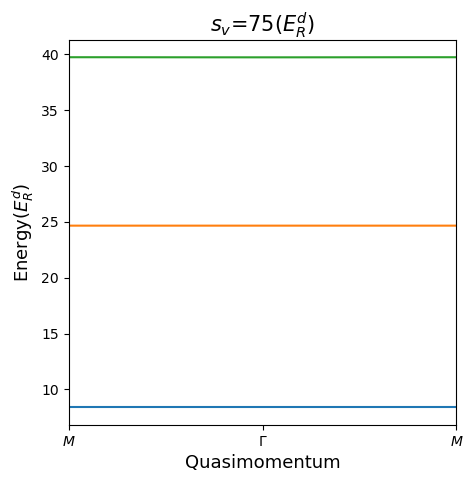

In [138]:
plt.figure(figsize=[5,5], dpi=100)
# list(map(lambda x: plt.plot(q,E[:,x]-np.min(E[:,0])), range(3)))
list(map(lambda x: plt.plot(q,E[:,x]), range(3)))
plt.xlim(-1,1)
plt.xlabel('Quasimomentum', fontsize=13)
plt.ylabel('Energy($E_R^d$)', fontsize=13)
plt.xticks([-1,0,1],[r"$M$",r"$\Gamma$", r"$M$"])
plt.title(r'$s_v$={:.0f}($E_R^d$)'.format(s), fontsize=15)

### Plot potential

Text(0.5, 1.0, '$s_v$=75($E_R^d$)')

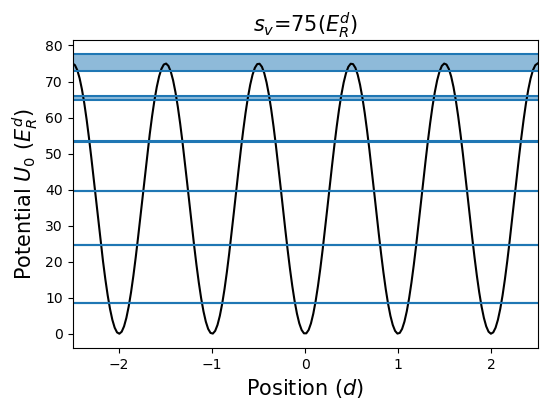

In [139]:
plt.figure(figsize=[6,4], dpi=100)
position_list = np.linspace(-2.5,2.5,200)
potential_list = s*np.sin(position_list*np.pi)**2
x_min = np.min(position_list)
x_max = np.max(position_list)
plt.plot(position_list,potential_list,color='black')
for i in range(n):
    if np.min(E[:,i]) < s:
        plt.axhspan(ymin=np.min(E[:,i]), ymax=np.max(E[:,i]),xmin=x_min,xmax=x_max,alpha=0.5)
        plt.hlines(y=np.min(E[:,i]),xmin=x_min,xmax=x_max)
        plt.hlines(y=np.max(E[:,i]),xmin=x_min,xmax=x_max)
    else:
        break

plt.xlim(np.min(position_list),np.max(position_list))
plt.xlabel(r'Position ($d$)', fontsize=15)
plt.ylabel(r'Potential $U_0$ ($E_R^d$)', fontsize=15)
plt.xticks([-2,-1,0,1,2])
plt.title(r'$s_v$={:.0f}($E_R^d$)'.format(s), fontsize=15)

In [140]:
lambda_v = 810*10**(-9) # Wavelength for vertical lattice [m]

angle = 9 # Incident angle from horizontal surface [degree]
theta = angle*np.pi/180
d_v = lambda_v / (2*np.sin(theta)) #lattice constant of vertical lattice [m]
er_v = h_bar**2*np.pi**2/(2*mrb*d_v**2) #Recoil energy of vertical lattice

print(er_v/(2*np.pi*h_bar))

85.53670673673882


Text(0.5, 1.0, '$s_v$=75($E_R^d$)')

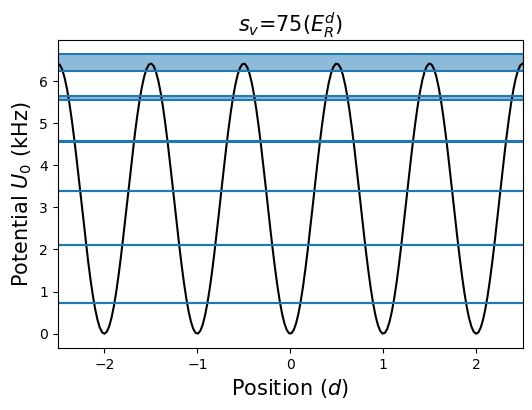

In [141]:
plt.figure(figsize=[6,4], dpi=100)
plt.plot(position_list,potential_list*er_v/(2*np.pi*h_bar)*1e-3,color='black')
for i in range(n):
    if np.min(E[:,i]) < s:
        plt.axhspan(ymin=np.min(E[:,i])*er_v/(2*np.pi*h_bar)*1e-3, ymax=np.max(E[:,i])*er_v/(2*np.pi*h_bar)*1e-3,xmin=x_min,xmax=x_max,alpha=0.5)
        plt.hlines(y=np.min(E[:,i])*er_v/(2*np.pi*h_bar)*1e-3,xmin=x_min,xmax=x_max)
        plt.hlines(y=np.max(E[:,i])*er_v/(2*np.pi*h_bar)*1e-3,xmin=x_min,xmax=x_max)
    else:
        break

plt.xlim(np.min(position_list),np.max(position_list))
plt.xlabel(r'Position ($d$)', fontsize=15)
plt.ylabel(r'Potential $U_0$ (kHz)', fontsize=15)
plt.xticks([-2,-1,0,1,2])
plt.title(r'$s_v$={:.0f}($E_R^d$)'.format(s), fontsize=15)

# With gradient

In [142]:
gravity = 9.8 #[m^2/s^2] gravitational force
delta_h = 2.5*1e-6 #[m] lattice constant
mass = 87/(6.02*1e23)*1e-3 #[kg] atomic mass of 87Rb

mgx = 1*mass*gravity*delta_h

In [143]:
potential_with_gradient_list = s*np.sin(position_list*np.pi)**2+mgx/er_v*position_list

Text(0.5, 1.0, '$s_v$=75($E_R^d$) with gravity')

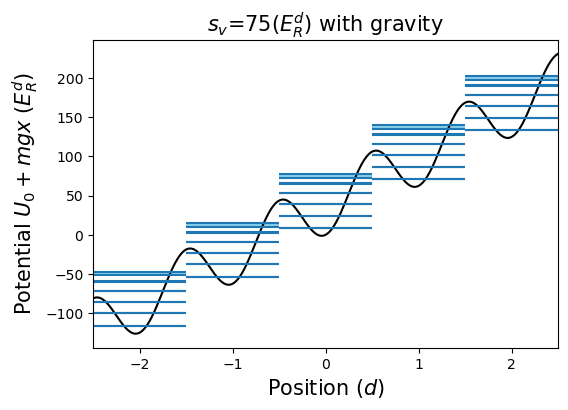

In [144]:
plt.figure(figsize=[6,4], dpi=100)
plt.plot(position_list,potential_with_gradient_list,c='black')
x_offset_list = np.arange(-2,3,1)
offset_list = s*np.sin(np.arange(-2,3,1)*np.pi)**2+mgx/er_v*np.arange(-2,3,1)
for j in range(len(offset_list)):
    for i in range(n):
        if np.min(E[:,i]) < s:
            # plt.axvspan(ymin=np.min(E[:,i])+offset_list[j], ymax=np.max(E[:,i])+offset_list[j], xmin=x_offset_list[j]-0.5, xmax=x_offset_list[j]+0.5, alpha=0.5)
            plt.fill_between(np.array([x_offset_list[j]-0.5, x_offset_list[j]+0.5]), np.array([np.min(E[:,i])+offset_list[j],np.min(E[:,i])+offset_list[j]]), np.array([np.max(E[:,i])+offset_list[j],np.max(E[:,i])+offset_list[j]]),fc='skyblue')
            plt.hlines(y=np.min(E[:,i])+offset_list[j],xmin=x_offset_list[j]-0.5,xmax=x_offset_list[j]+0.5)
            plt.hlines(y=np.max(E[:,i])+offset_list[j],xmin=x_offset_list[j]-0.5,xmax=x_offset_list[j]+0.5)
        else:
            break

plt.xlim(np.min(position_list),np.max(position_list))
plt.xlabel(r'Position ($d$)', fontsize=15)
plt.ylabel(r'Potential $U_0+mgx$ ($E_R^d$)', fontsize=15)
plt.xticks([-2,-1,0,1,2])
plt.title(r'$s_v$={:.0f}($E_R^d$) with gravity'.format(s), fontsize=15)

# With gravity + B-field gradient

In [172]:
layer_pickup_coil = 2.64*1e2 #[Gauss/(m*A)]
lattice_const = 2.5*1e-6 #[m] lattice constant
g_factor = -0.7*1e6 #[s^-1 / Gauss]
mf_state = -1
amphere_per_volt = 30/10 #[A/V]

magnetic_gradient = layer_pickup_coil*lattice_const*g_factor*mf_state*amphere_per_volt #[Hz/V]
print(magnetic_gradient/(er_v/(2*np.pi*h_bar)))

ctrl_voltage = 5.5

16.203569822553153


In [173]:
potential_with_gradient_list_2 = s*np.sin(position_list*np.pi)**2+mgx/er_v*position_list+magnetic_gradient/(er_v/(2*np.pi*h_bar))*position_list*ctrl_voltage

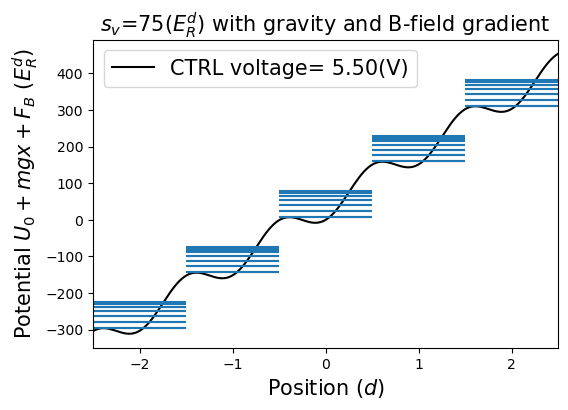

In [174]:
plt.figure(figsize=[6,4], dpi=100)
plt.plot(position_list,potential_with_gradient_list_2,c='black',label='CTRL voltage= %.02f(V)'%(ctrl_voltage))
x_offset_list = np.arange(-2,3,1)
offset_list = s*np.sin(np.arange(-2,3,1)*np.pi)**2+mgx/er_v*np.arange(-2,3,1)+magnetic_gradient/(er_v/(2*np.pi*h_bar))*ctrl_voltage*np.arange(-2,3,1)
for j in range(len(offset_list)):
    for i in range(n):
        if np.min(E[:,i]) < s:
            # plt.axvspan(ymin=np.min(E[:,i])+offset_list[j], ymax=np.max(E[:,i])+offset_list[j], xmin=x_offset_list[j]-0.5, xmax=x_offset_list[j]+0.5, alpha=0.5)
            plt.fill_between(np.array([x_offset_list[j]-0.5, x_offset_list[j]+0.5]), np.array([np.min(E[:,i])+offset_list[j],np.min(E[:,i])+offset_list[j]]), np.array([np.max(E[:,i])+offset_list[j],np.max(E[:,i])+offset_list[j]]),fc='skyblue')
            plt.hlines(y=np.min(E[:,i])+offset_list[j],xmin=x_offset_list[j]-0.5,xmax=x_offset_list[j]+0.5)
            plt.hlines(y=np.max(E[:,i])+offset_list[j],xmin=x_offset_list[j]-0.5,xmax=x_offset_list[j]+0.5)
        else:
            break

plt.xlim(np.min(position_list),np.max(position_list))
plt.xlabel(r'Position ($d$)', fontsize=15)
plt.ylabel(r'Potential $U_0+mgx+F_B$ ($E_R^d$)', fontsize=15)
plt.xticks([-2,-1,0,1,2])
plt.title(r'$s_v$={:.0f}($E_R^d$) with gravity and B-field gradient'.format(s), fontsize=15)
plt.legend(fontsize=15)

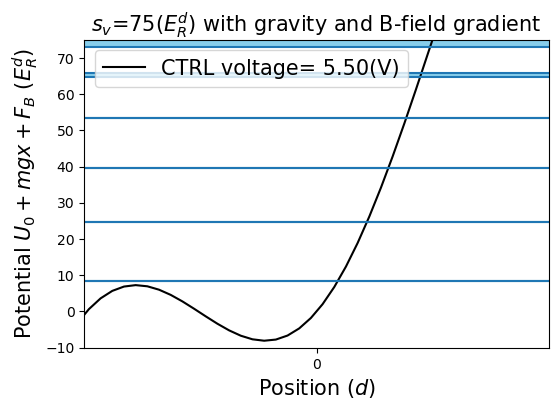

In [175]:
plt.figure(figsize=[6,4], dpi=100)
plt.plot(position_list,potential_with_gradient_list_2,c='black',label='CTRL voltage= %.02f(V)'%(ctrl_voltage))
x_offset_list = np.arange(-2,3,1)
offset_list = s*np.sin(np.arange(-2,3,1)*np.pi)**2+mgx/er_v*np.arange(-2,3,1)+magnetic_gradient/(er_v/(2*np.pi*h_bar))*ctrl_voltage*np.arange(-2,3,1)
for j in range(len(offset_list)):
    for i in range(n):
        if np.min(E[:,i]) < s:
            # plt.axvspan(ymin=np.min(E[:,i])+offset_list[j], ymax=np.max(E[:,i])+offset_list[j], xmin=x_offset_list[j]-0.5, xmax=x_offset_list[j]+0.5, alpha=0.5)
            plt.fill_between(np.array([x_offset_list[j]-0.5, x_offset_list[j]+0.5]), np.array([np.min(E[:,i])+offset_list[j],np.min(E[:,i])+offset_list[j]]), np.array([np.max(E[:,i])+offset_list[j],np.max(E[:,i])+offset_list[j]]),fc='skyblue')
            plt.hlines(y=np.min(E[:,i])+offset_list[j],xmin=x_offset_list[j]-0.5,xmax=x_offset_list[j]+0.5)
            plt.hlines(y=np.max(E[:,i])+offset_list[j],xmin=x_offset_list[j]-0.5,xmax=x_offset_list[j]+0.5)
        else:
            break

plt.xlim(np.min(position_list),np.max(position_list))
plt.xlabel(r'Position ($d$)', fontsize=15)
plt.ylabel(r'Potential $U_0+mgx+F_B$ ($E_R^d$)', fontsize=15)
plt.xticks([-2,-1,0,1,2])
plt.xlim([-0.5,0.5])
plt.ylim([-10,s])
plt.title(r'$s_v$={:.0f}($E_R^d$) with gravity and B-field gradient'.format(s), fontsize=15)
plt.legend(fontsize=15)